# Service de prêt bancaire

In [97]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sbn

### Imporatation du fichier **prets.csv**:

In [38]:
prets = pd.read_csv("prets.csv")
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014


### Calcul du **taux d'endettement**:

In [39]:
prets["taux_endettement"]=round(prets["remboursement"]*100/prets["revenu"],2)
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux,taux_endettement
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80


### Changement de `taux` en `taux_interet`:

In [40]:
prets = prets.rename(columns={"taux":"taux_interet"})
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80


### Calcul du **coût total** du prêt:

In [41]:
prets["cout_total"] = prets["remboursement"]*prets["duree"]
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80,271212.0
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50,132609.6
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80,105485.4


### Calcul des **bénéfices mensuels**:

In [42]:
prets["benefices"]=round((prets["cout_total"]*prets["taux_interet"]/100)/24,2) 
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80,271212.0,131.99
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.97
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50,132609.6,53.71
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80,105485.4,44.57


### **5 premiers clients** sur lesquels la banque fait le plus de bénéfices:

In [43]:
prets.sort_values("benefices", ascending=False).head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices
8,7,NICE,6000,5486.0,2956.95,300,immobilier,1.184,53.9,887085.0,437.63
23,22,NICE,6300,5838.0,3018.25,240,immobilier,1.229,51.7,724380.0,370.94
186,173,PARIS,75006,6784.0,3744.77,180,immobilier,1.248,55.2,674058.6,350.51
242,226,PARIS,75002,5098.0,2910.96,240,immobilier,1.140,57.1,698630.4,331.85
181,168,PARIS,75003,6366.0,2807.41,240,immobilier,1.176,44.1,673778.4,330.15


### **Nombre de personnes** ayant depassé le taux d'endettement maximal:

In [44]:
print("{} personnes ont depassé le taux d'endettement de 35%.".format(prets.loc[prets["taux_endettement"]>35,:].shape[0]))

58 personnes ont depassé le taux d'endettement de 35%.


### **Nombre de personnes** ayant depassé le taux d'endettement maximal sur **l'agence parisienne**:

In [45]:
print("{} personne ont depassé le taux d'endettement de 35% sur l'agence parisienne".format(prets.loc[(prets["taux_endettement"]>35) & (prets["ville"]=="PARIS"),:].shape[0]))

16 personne ont depassé le taux d'endettement de 35% sur l'agence parisienne


### Ajout d'une variable nommé `risque` pour identifier les personnes en situation bancaire risqué:

In [46]:
prets["risque"]="Non"
prets.loc[prets["taux_endettement"]>35,"risque"]="Oui"
prets.head(10)

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80,271212.0,131.99,Non
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,Non
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.97,Non
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50,132609.6,53.71,Non
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80,105485.4,44.57,Non
5,4,MARSEILLE,13012,1476.0,423.61,240,immobilier,1.209,28.70,101666.4,51.21,Non
6,5,PARIS,75016,2476.0,836.89,240,immobilier,1.116,33.80,200853.6,93.40,Non
7,6,LYON,69008,1867.0,711.33,240,immobilier,1.196,38.10,170719.2,85.08,Oui
8,7,NICE,6000,5486.0,2956.95,300,immobilier,1.184,53.90,887085.0,437.63,Oui
9,8,BORDEAUX,33200,3578.0,751.38,180,immobilier,1.316,21.00,135248.4,74.16,Non


### Nombre de **prêts automobile** accordé:

In [49]:
print("{} prêts de type automobile ont été accordés.".format(prets.loc[prets["type"]=="automobile",:].shape[0]))

16 prêts de type automobile ont été accordés.


### **Cout total moyen** des prêts automobile:

In [53]:
print(f"Le cout total moyen des prêts de type automobile est de : {prets.loc[prets['type']=='automobile','cout_total'].mean()}€")

Le cout total moyen des prêts de type automobile est de : 13665.0€


### **Bénéfice mensuel** réalisé par l'agence **toulousaine**:

In [57]:
print(f"Le bénéfice mensuel réalisé par l'agence toulousaine s'élève à : {prets.loc[prets['ville']=='TOULOUSE', 'benefices'].sum()}€")

Le bénéfice mensuel réalisé par l'agence toulousaine s'élève à : 2138.0699999999997€


### Création d'un data frame  nommé **profils_client**.
Ce data frame devra contenir pour chaque client, la somme des:
-Remboursements;
-Taux d'endettement;
-Coût total;
-Bénéfices.

In [79]:
profils_client =prets.groupby("identifiant")[["remboursement","taux_endettement","cout_total","benefices"]].sum()
profils_client=profils_client.reset_index()
profils_client.head()

,identifiant,remboursement,taux_endettement,cout_total,benefices
0,0,1130.05,30.80,271212.0,131.99
1,1,1487.85,28.02,389715.0,206.66
2,2,552.54,29.50,132609.6,53.71
3,3,586.03,34.80,105485.4,44.57
4,4,423.61,28.70,101666.4,51.21


### Nombre de personne de situation **bancaire risqué** à partir du **profils client**:

In [80]:
print("A partir du profils_client, {} personnes sont en situation bancaire risqué.".format(profils_client.loc[profils_client['taux_endettement']>35,:].shape[0]))

A partir du profils_client, 62 personnes sont en situation bancaire risqué.


### **Bénéfice** realisé par chacune des **agences** et par **type**:

In [81]:
prets.groupby(["ville","type"]).agg({"benefices":np.sum})

benefices
ville     type                 
BORDEAUX  immobilier    1681.32
LYON      automobile      47.39
          immobilier    2967.41
MARSEILLE automobile      61.36
          immobilier    4334.55
NICE      automobile      31.15
          immobilier    2651.60
PARIS     automobile      99.50
          immobilier    9916.85
TOULOUSE  automobile      61.22
          immobilier    2076.85

### Affichage sur **un tableau à double entrée** des **bénéfice moyen** realisé par chacune des **agences** et par **type**:

In [82]:
prets.pivot_table(index="ville", columns="type", values="benefices", aggfunc=np.mean)

type,automobile,immobilier
ville,,
BORDEAUX,NaN,105.082500
LYON,15.796667,118.696400
MARSEILLE,20.453333,60.202083
NICE,15.575000,139.557895
PARIS,19.900000,137.734028
TOULOUSE,20.406667,86.535417


### Importation du fichier **clients.csv**:

In [83]:
clients1 = pd.read_csv("clients.csv")
clients1.head()

,identifiant,email,nom,genre
0,0,LaurentDagenais@rhyta.com,Laurent Dagenais,M
1,1,GuyMarois@fleckens.hu,Guy Marois,M
2,2,BeaufortLesage@einrot.com,Beaufort Lesage,M
3,3,RussellDurand@armyspy.com,Russell Durand,M
4,4,AlexisRiel@rhyta.com,Alexis Riel,M


### Importation du fichier **clients_suite.csv**:

In [84]:
clients2 = pd.read_csv("clients_suite.csv")
clients2.head()

,identifiant,email,nom,genre
0,150,RochMireault@gustr.com,Roch Mireault,M
1,151,NathalieCormier@cuvox.de,Nathalie Cormier,F
2,152,VallisMainville@gustr.com,Vallis Mainville,M
3,153,DanielleNeufville@teleworm.us,Danielle Neufville,F
4,154,AllyrianeRacine@gustr.com,Allyriane Racine,F


### **Fusion** des deux fichiers sur les clients:

In [85]:
clients = pd.concat((clients1,clients2))
clients.head()

,identifiant,email,nom,genre
0,0,LaurentDagenais@rhyta.com,Laurent Dagenais,M
1,1,GuyMarois@fleckens.hu,Guy Marois,M
2,2,BeaufortLesage@einrot.com,Beaufort Lesage,M
3,3,RussellDurand@armyspy.com,Russell Durand,M
4,4,AlexisRiel@rhyta.com,Alexis Riel,M


### Fusion de la variable **clients** à la variable **profils_client** dans une variable nommée **data**:

In [87]:
data = pd.merge(clients, profils_client, on="identifiant", how="inner")
data.head()

,identifiant,email,nom,genre,remboursement,taux_endettement,cout_total,benefices
0,0,LaurentDagenais@rhyta.com,Laurent Dagenais,M,1130.05,30.80,271212.0,131.99
1,1,GuyMarois@fleckens.hu,Guy Marois,M,1487.85,28.02,389715.0,206.66
2,2,BeaufortLesage@einrot.com,Beaufort Lesage,M,552.54,29.50,132609.6,53.71
3,3,RussellDurand@armyspy.com,Russell Durand,M,586.03,34.80,105485.4,44.57
4,4,AlexisRiel@rhyta.com,Alexis Riel,M,423.61,28.70,101666.4,51.21


### Importation du fichier **client_age.csv**:

In [89]:
client_age = pd.read_csv("client_age.csv")
client_age.head()

,identifiant,age
0,0,54
1,1,23
2,2,30
3,3,42
4,4,47


### Fusion de la variable **data** à la variable **client_age**:

In [90]:
data.merge(client_age, on="identifiant",how="left")

,identifiant,email,nom,genre,remboursement,taux_endettement,cout_total,benefices,age
0,0,LaurentDagenais@rhyta.com,Laurent Dagenais,M,1130.05,30.80,271212.0,131.99,54.0
1,1,GuyMarois@fleckens.hu,Guy Marois,M,1487.85,28.02,389715.0,206.66,23.0
2,2,BeaufortLesage@einrot.com,Beaufort Lesage,M,552.54,29.50,132609.6,53.71,30.0
3,3,RussellDurand@armyspy.com,Russell Durand,M,586.03,34.80,105485.4,44.57,42.0
4,4,AlexisRiel@rhyta.com,Alexis Riel,M,423.61,28.70,101666.4,51.21,47.0
...,...,...,...,...,...,...,...,...,...
301,225,PascalineBeaudry@rhyta.com,Pascaline Beaudry,F,876.43,37.20,157757.4,77.04,29.0
302,226,FleurCaouette@jourrapide.com,Fleur Caouette,F,2910.96,57.10,698630.4,331.85,26.0
303,226,FleurCaouette@jourrapide.com,Fleur Caouette,F,2910.96,57.10,698630.4,331.85,26.0
304,227,FrancisMasse@jourrapide.com,Francis Masse,M,434.38,18.50,130314.0,62.82,27.0


### Visualisation du prêt par type de prêt (Matplotlib):

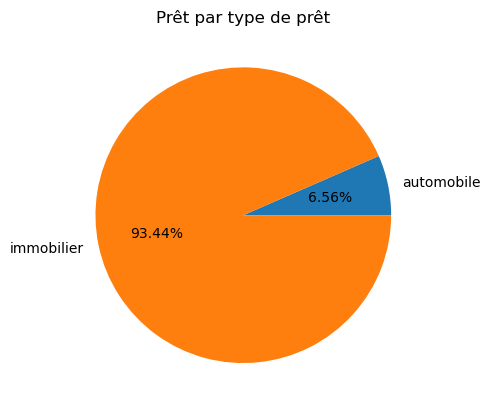

In [136]:
type_pret = prets.groupby("type").size()
type_pret = type_pret.reset_index()
type_pret.columns=["type","nombre"]

plt.title("Prêt par type de prêt")
plt.pie(x=type_pret["nombre"], labels=type_pret["type"], autopct="%.2f%%")
plt.show()

### Visualisation du bénéfice mensuel réalisé par chaque client en fonction du revenu sur les prêts immobiliers (Matplotlib):

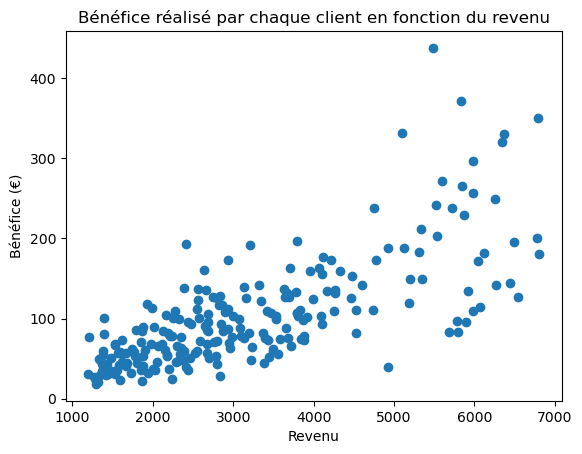

In [145]:
plt.title("Bénéfice réalisé par chaque client en fonction du revenu")
plt.scatter(prets.loc[prets["type"]=="immobilier","revenu"],prets.loc[prets["type"]=="immobilier","benefices"])
plt.xlabel("Revenu")
plt.ylabel("Bénéfice (€)")
plt.show()

### Visualisation du bénéfice mensuel total réalisé par agence (Matplotlib):

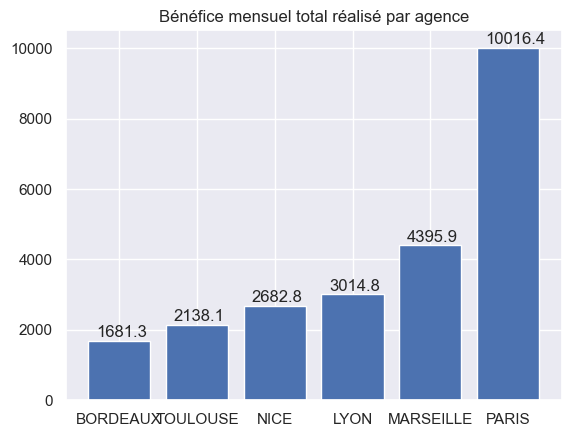

In [200]:
benef_mens = prets.groupby("ville").agg({"benefices":np.sum})
benef_mens = benef_mens.sort_values("benefices")
benef_mens = benef_mens.reset_index()

plt.title("Bénéfice mensuel total réalisé par agence")
plt.bar(x=benef_mens["ville"],height=benef_mens["benefices"])
benefices = round(benef_mens["benefices"],1).to_list()
for i in range (6):
    plt.text(i-0.3, benefices[i]+100, benefices[i])
plt.xlabel("Agence")
plt.ylabel("Bénéfices (€)")
plt.show()

### Visualisation de la distribution des bénéfices (Matplotlib):

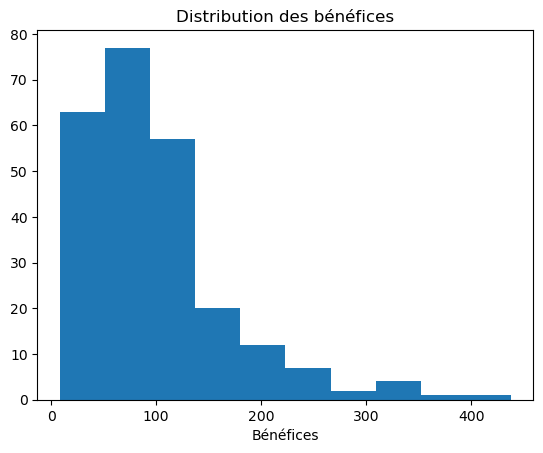

In [105]:
plt.title("Distribution des bénéfices")
plt.hist(prets["benefices"])
plt.xlabel("Bénéfices")
plt.show()

### Importation du fichier **CA.csv**:

In [107]:
CA= pd.read_csv("CA.csv")
CA.head()

,date,immobilier,automobile,consommation
0,2021-01-01,10439,5096,3808
1,2021-02-01,11266,5146,5838
2,2021-03-01,11315,5276,5601
3,2021-04-01,11456,5067,3639
4,2021-05-01,10816,4937,5273


### Visualisation de l'évolution du bénéfices mensuels sur l’année, par type de prêt (Matplotlib):

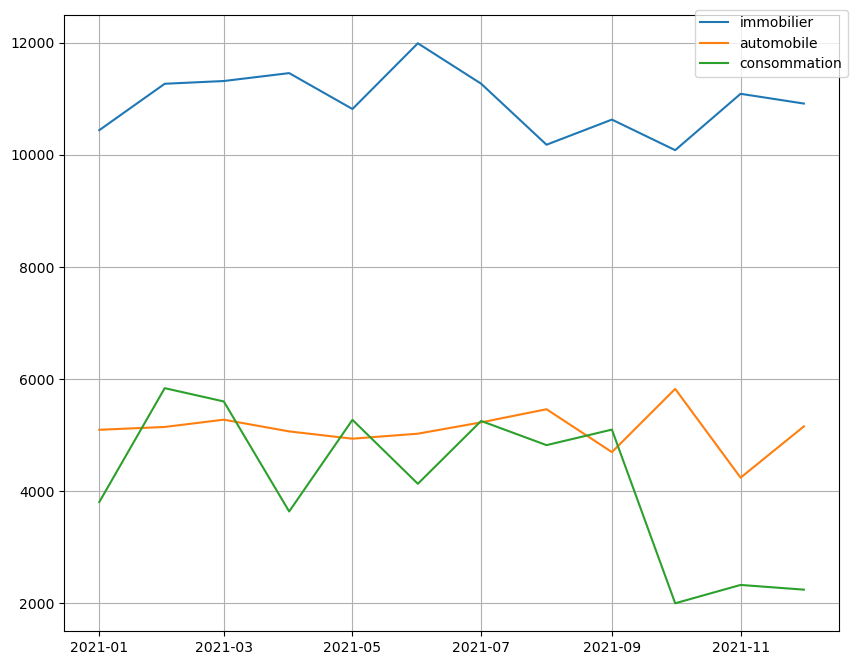

In [138]:
type_immobilier = CA["immobilier"]
type_automobile = CA["automobile"]
type_consommation = CA["consommation"]

CA["date"]= pd.to_datetime(CA["date"])

plt.figure(figsize=(10,8))
plt.plot(CA["date"], type_immobilier,label="immobilier")
plt.plot(CA["date"], type_automobile, label="automobile")
plt.plot(CA["date"], type_consommation, label="consommation")
plt.legend(bbox_to_anchor=(1.02,1.02))
plt.grid()
plt.show()

### Visualisation de l'évolution du bénéfice mensuel du prêt de type **immobilier** (Seaborn):

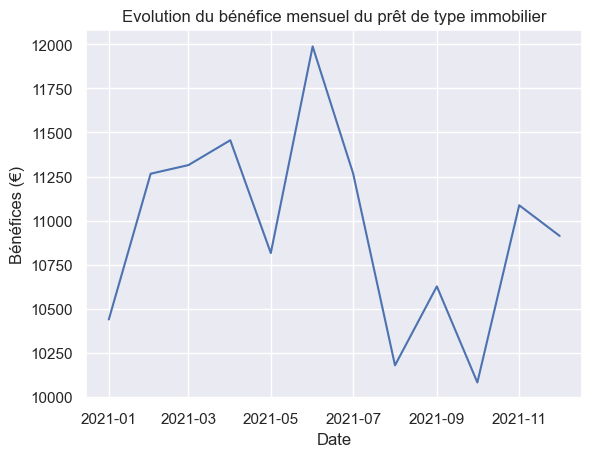

In [151]:
plt.title("Evolution du bénéfice mensuel du prêt de type immobilier")
sbn.lineplot(data=CA, x="date",y="immobilier")
sbn.set_theme()
plt.xlabel("Date")
plt.ylabel("Bénéfices (€)")
plt.show()

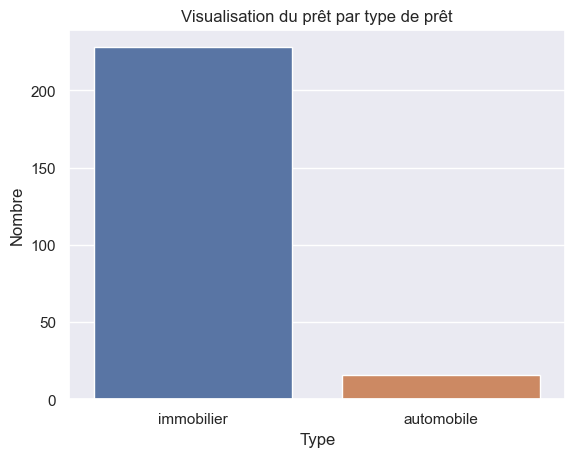

In [169]:
plt.title("Visualisation du prêt par type de prêt")
sbn.countplot(data=prets, x="type")
plt.xlabel("Type")
plt.ylabel("Nombre")
plt.show()

### Visualisation du bénéfice mensuel réalisé par chaque client en fonction du revenu sur les prêts immobiliers (Seaborn):

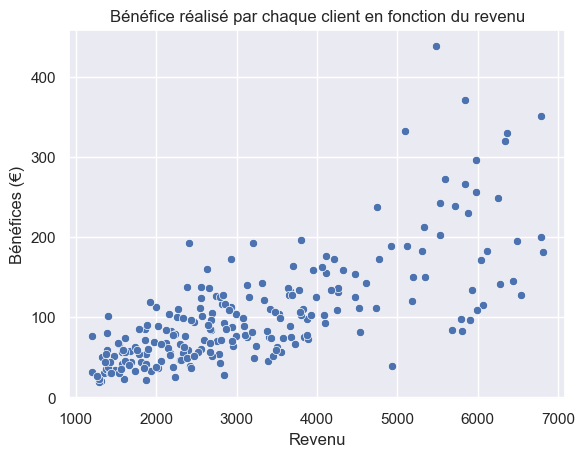

In [179]:
benef_immobilier= prets.loc[prets["type"]=="immobilier",["revenu","benefices"]]
plt.title("Bénéfice réalisé par chaque client en fonction du revenu")
sbn.scatterplot(data=benef_immobilier, x="revenu", y="benefices")
plt.xlabel("Revenu")
plt.ylabel("Bénéfices (€)")
plt.show()


### Visualisation de la distribution des bénéfices (Seaborn - histplot):

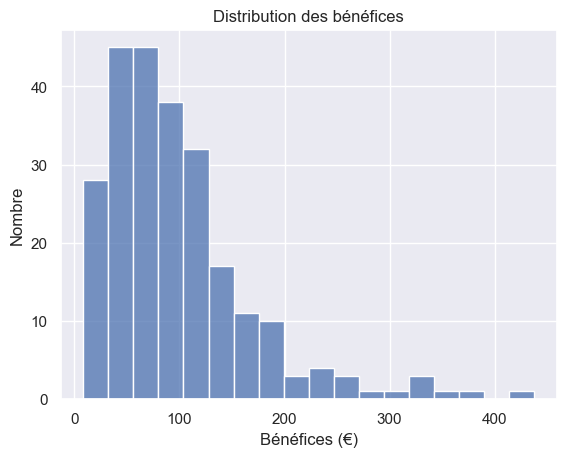

In [182]:
plt.title("Distribution des bénéfices")
sbn.histplot(data=prets, x="benefices")
plt.xlabel("Bénéfices (€)")
plt.ylabel("Nombre")
plt.show()

### Visualisation de la distribution des bénéfices (Seaborn - kdeplot):

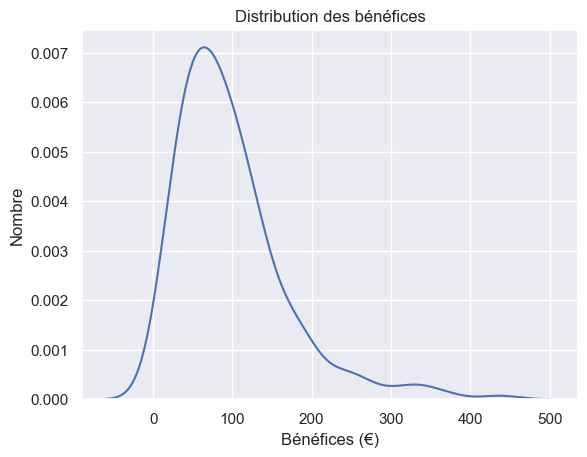

In [183]:
plt.title("Distribution des bénéfices")
sbn.kdeplot(data=prets, x="benefices")
plt.xlabel("Bénéfices (€)")
plt.ylabel("Nombre")
plt.show()

### Visualisation du bénéfice mensuel total réalisé par agence (Seaborn):

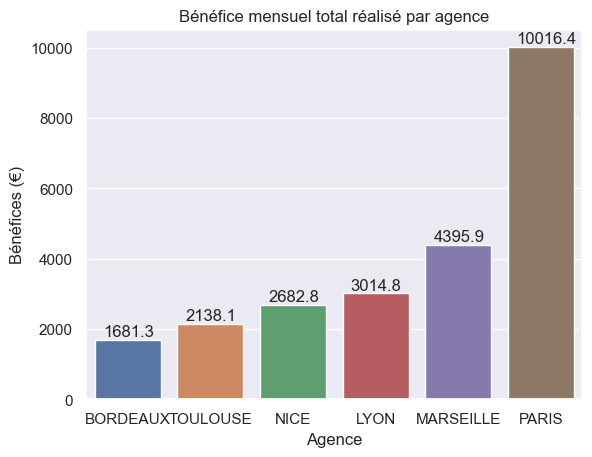

In [206]:
plt.title("Bénéfice mensuel total réalisé par agence")
sbn.barplot(data=benef_mens, x="ville",y="benefices", errorbar=None)
for i in range(6):
    plt.text(i-0.3, benefices[i]+100, benefices[i])
plt.xlabel("Agence")
plt.ylabel("Bénéfices (€)")
plt.show()